# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest
import statsmodels.api as sm
from scipy.stats import kstest
from scipy.stats import mannwhitneyu
import numpy as np 
import seaborn as sns

# Read data

In [2]:
# Load the data
df = pd.read_excel("privacy 1.xlsx", header=0)

# Plot histograms
The distribution for the "Like/Know" variable is non-normal and is skewed toward scores >=3, whereas the distribution of "Commodity" is closer to a normal distribution. 

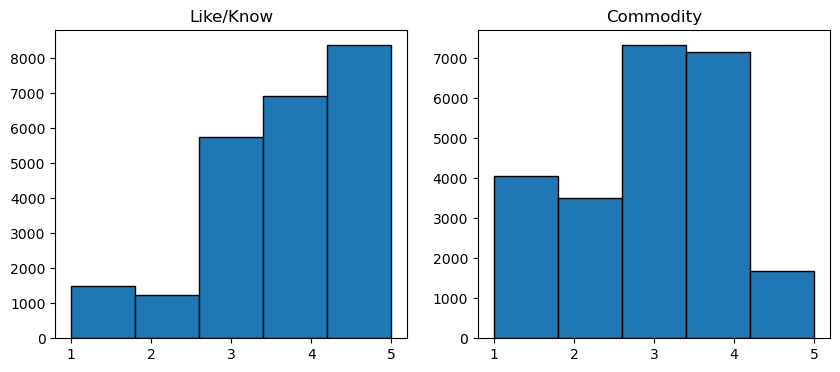

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# histogram of like_know
axs[0].hist(df['like_know'], edgecolor='black', bins=5)
axs[0].set_title('Like/Know')

# histogram of commodity
axs[1].hist(df['commodity'], edgecolor='black', bins=5)
axs[1].set_title('Commodity')

plt.show()

# Analyzing the effects of gender and Coca-Cola consumption on the Like/Know variable
## Approach
1. Test if the distribution of the 'Like/Know' is normal with `analyze_distribution`
2. If non-normal, perform Mann-Whitney U test
## Results
For both comparisons, the Mann-Whitney U test showed very high U-test statistics but low p-values. 

`Analysis for gender vs. like_know: Mann-Whitney U test results: u-statistic = 71736215.000, p-value = 0.0000140044`

`Analysis for classic_coke vs. like_know: Mann-Whitney U test results: u-statistic = 61607033.500, p-value = 0.0013429061`

## Discussion
A high U statistic with a very low p-value (i.e., a high level of significance) suggests that there is a significant difference in the distributions of the two groups, despite having the same median. This can happen for several reasons:

1. The shape of the distributions is different: The Mann-Whitney U test is sensitive to the shape of the distributions, even if the medians are the same. If one distribution is more spread out or has heavier tails, the U statistic may be high and the p-value low.

2. Outliers or extreme values: Outliers or extreme values can have a large impact on the U statistic, even if they don't affect the median. If one group has more extreme values than the other, this can result in a high U statistic and low p-value, despite having the same median.

3. Sample size: The sample size can also impact the U statistic and p-value, even if the medians are the same. If one group has a smaller sample size than the other, the U statistic may be higher and the p-value lower.

In [4]:
def analyze_distribution(df, column):
    """
    Analyzes the distribution of a specified column from a given DataFrame.
    Drops missing values from the column, creates a histogram and a Q-Q plot, 
    and performs Shapiro-Wilk and Kolmogorov-Smirnov tests for normality.
    
    Parameters:
    df (pandas DataFrame): The DataFrame to be analyzed
    column (str): The column name from the DataFrame to be analyzed
    
    Returns:
    None
    """
    #drop missing values
    column = df[column].dropna()
    
    #create histogram
    plt.hist(column, edgecolor='black', bins=5)
    plt.show()
    
    #create Q-Q plot with 45-degree line added to plot
    sm.qqplot(column, line='45')
    plt.show()
    
    #perform Shapiro-Wilk test for normality
    shapiro_results = shapiro(column)
    print("Shapiro-Wilk test results:", shapiro_results)
    
    #perform Kolmogorov-Smirnov test for normality
    kstest_results = kstest(column, 'norm')
    print("Kolmogorov-Smirnov test results:", kstest_results)

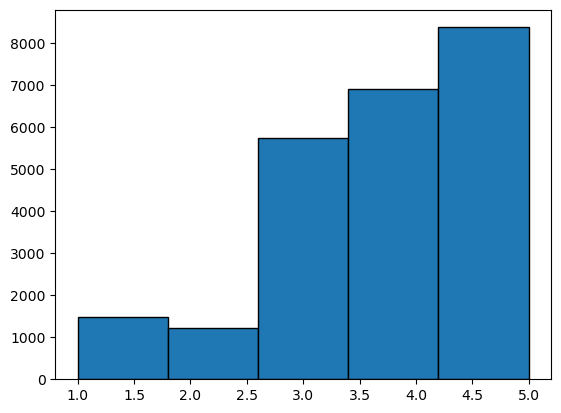

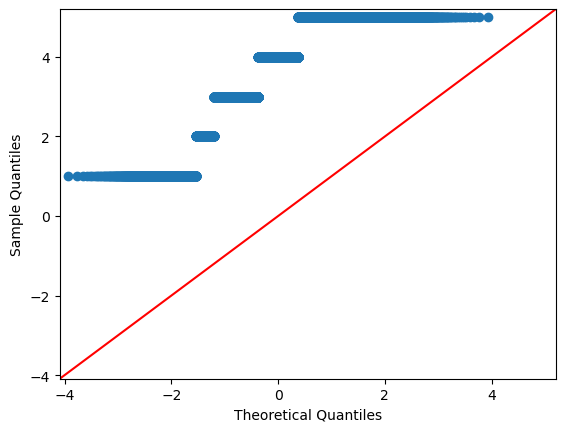

Shapiro-Wilk test results: ShapiroResult(statistic=0.844109058380127, pvalue=0.0)
Kolmogorov-Smirnov test results: KstestResult(statistic=0.9146446137574455, pvalue=0.0)
Analysis for gender vs. like_know
Mann-Whitney U test results: u-statistic = 71736215.000, p-value = 0.0000140044


/Users/eri/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


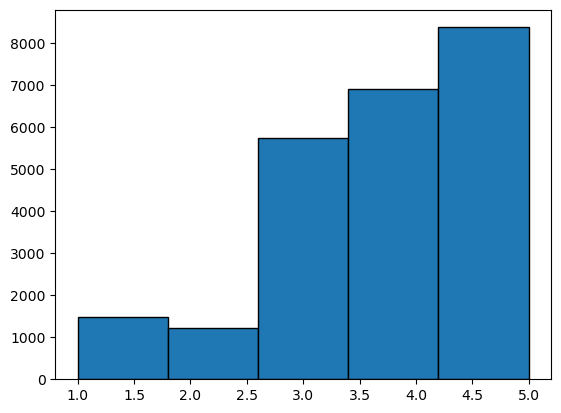

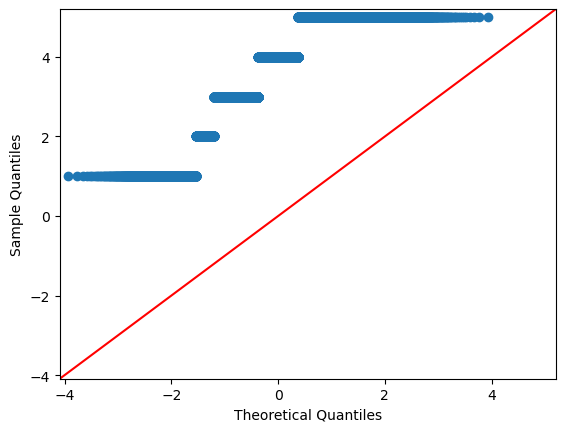

Shapiro-Wilk test results: ShapiroResult(statistic=0.844109058380127, pvalue=0.0)
Kolmogorov-Smirnov test results: KstestResult(statistic=0.9146446137574455, pvalue=0.0)
Analysis for classic_coke vs. like_know
Mann-Whitney U test results: u-statistic = 61607033.500, p-value = 0.0013429061


/Users/eri/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [5]:
for col in ['gender','classic_coke']:
    analyze_distribution(df, 'like_know')

    #perform Mann-Whitney U test

    group1 = df.query(col + ' == 0')['like_know'].dropna().values
    group2 = df.query(col + ' == 1')['like_know'].dropna().values

    u, p = mannwhitneyu(group1, group2)
    print(f'Analysis for {col} vs. like_know')
    print("Mann-Whitney U test results: u-statistic = {:.3f}, p-value = {:.10f}".format(u, p))

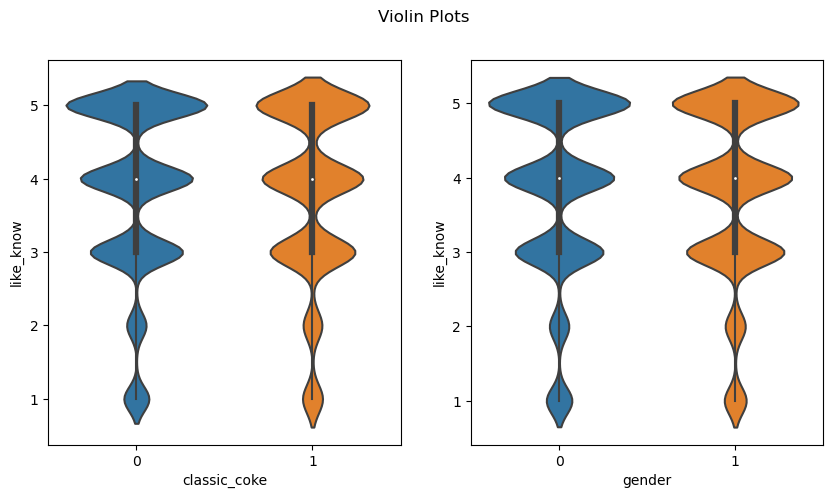

In [6]:
# Create a subplot with two violin plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.violinplot(x="classic_coke", y="like_know", data=df, ax=ax[0])
sns.violinplot(x="gender", y="like_know", data=df, ax=ax[1])

# Add a title and labels to the plot
plt.suptitle("Violin Plots")
ax[0].set_xlabel("classic_coke")
ax[0].set_ylabel("like_know")
ax[1].set_xlabel("gender")
ax[1].set_ylabel("like_know")

# Show the plot
plt.show()